<a href="https://colab.research.google.com/github/deepak10pk/StackOverflow-Classification/blob/master/stack_overflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%tensorflow_version 2.x

TensorFlow 2.x selected.


In [2]:
!wget https://www.dropbox.com/s/5721wcs2guuykzl/stacksample.zip

--2019-12-28 11:17:25--  https://www.dropbox.com/s/5721wcs2guuykzl/stacksample.zip
Resolving www.dropbox.com (www.dropbox.com)... 162.125.8.1, 2620:100:6016:1::a27d:101
Connecting to www.dropbox.com (www.dropbox.com)|162.125.8.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/5721wcs2guuykzl/stacksample.zip [following]
--2019-12-28 11:17:26--  https://www.dropbox.com/s/raw/5721wcs2guuykzl/stacksample.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uca8664568c9783497e2c98c91c1.dl.dropboxusercontent.com/cd/0/inline/AvF6HGN8rXg4Qa55hzpqG1rrHdTSerwUHho8QWqytk2amt1_QrXUiK4HbHKXAaUTtnXW-z_WdtrS50Fa2x261wLnL6PVRdy-iAs_7W9vd51V1w/file# [following]
--2019-12-28 11:17:26--  https://uca8664568c9783497e2c98c91c1.dl.dropboxusercontent.com/cd/0/inline/AvF6HGN8rXg4Qa55hzpqG1rrHdTSerwUHho8QWqytk2amt1_QrXUiK4HbHKXAaUTtnXW-z_WdtrS50Fa2x261wLnL6PVRdy-iAs_7W9vd51V1w/file
Resolving 

In [3]:
!unzip stacksample.zip

Archive:  stacksample.zip
  inflating: Answers.csv             
  inflating: Questions.csv           
  inflating: Tags.csv                


In [0]:
 
import pandas as pd
import numpy as np


In [0]:

ques=pd.read_csv('/content/Questions.csv',encoding='iso-8859-1')

In [6]:
ques.head()

,Id,OwnerUserId,CreationDate,ClosedDate,Score,Title,Body
0,80,26.0,2008-08-01T13:57:07Z,NaN,26,SQLStatement.execute() - multiple queries in o...,<p>I've written a database generation script i...
1,90,58.0,2008-08-01T14:41:24Z,2012-12-26T03:45:49Z,144,Good branching and merging tutorials for Torto...,<p>Are there any really good tutorials explain...
2,120,83.0,2008-08-01T15:50:08Z,NaN,21,ASP.NET Site Maps,<p>Has anyone got experience creating <strong>...
3,180,2089740.0,2008-08-01T18:42:19Z,NaN,53,Function for creating color wheels,<p>This is something I've pseudo-solved many t...
4,260,91.0,2008-08-01T23:22:08Z,NaN,49,Adding scripting functionality to .NET applica...,<p>I have a little game written in C#. It uses...


In [0]:
tag=r'/content/Tags.csv'
tags=pd.read_csv(tag,encoding='iso-8859-1')

In [8]:
tags.head()

,Id,Tag
0,80,flex
1,80,actionscript-3
2,80,air
3,90,svn
4,90,tortoisesvn


In [9]:
ques.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1264216 entries, 0 to 1264215
Data columns (total 7 columns):
Id              1264216 non-null int64
OwnerUserId     1249762 non-null float64
CreationDate    1264216 non-null object
ClosedDate      55959 non-null object
Score           1264216 non-null int64
Title           1264216 non-null object
Body            1264216 non-null object
dtypes: float64(1), int64(2), object(4)
memory usage: 67.5+ MB


In [10]:
tags.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3750994 entries, 0 to 3750993
Data columns (total 2 columns):
Id     int64
Tag    object
dtypes: int64(1), object(1)
memory usage: 57.2+ MB


In [0]:
tags['Tag']=tags['Tag'].astype(str)

# First, what I want to do is to merge both dataframes. In order to do that, I'll have to group tags by the id of the post since a post can have multiple tags. I'll just use the groupeby function and then merge the dataframes on the id.

In [0]:
group_tags=tags.groupby('Id')['Tag'].apply(lambda tags: ''.join(tags))

In [13]:
group_tags.head()

Id
80                           flexactionscript-3air
90       svntortoisesvnbranchbranching-and-merging
120                              sqlasp.netsitemap
180    algorithmlanguage-agnosticcolorscolor-space
260           c#.netscriptingcompiler-construction
Name: Tag, dtype: object

In [14]:
group_tags.reset_index()

,Id,Tag
0,80,flexactionscript-3air
1,90,svntortoisesvnbranchbranching-and-merging
2,120,sqlasp.netsitemap
3,180,algorithmlanguage-agnosticcolorscolor-space
4,260,c#.netscriptingcompiler-construction
...,...,...
1264211,40143210,php.htaccess
1264212,40143300,google-bigquery
1264213,40143340,androidandroid-studio
1264214,40143360,javascriptvue.js


In [0]:
group_tags_final=pd.DataFrame({'Id':group_tags.index,'Tags':group_tags.values})

In [16]:
group_tags_final.head()

,Id,Tags
0,80,flexactionscript-3air
1,90,svntortoisesvnbranchbranching-and-merging
2,120,sqlasp.netsitemap
3,180,algorithmlanguage-agnosticcolorscolor-space
4,260,c#.netscriptingcompiler-construction


In [18]:
group_tags_final.head(5)

,Id,Tags
0,80,flexactionscript-3air
1,90,svntortoisesvnbranchbranching-and-merging
2,120,sqlasp.netsitemap
3,180,algorithmlanguage-agnosticcolorscolor-space
4,260,c#.netscriptingcompiler-construction


In [0]:
ques.drop(columns=['OwnerUserId', 'CreationDate', 'ClosedDate'],inplace=True)

In [0]:
ques=ques.merge(group_tags_final,on='Id')

In [20]:
ques.head(5)

,Id,Score,Title,Body,Tags
0,80,26,SQLStatement.execute() - multiple queries in o...,<p>I've written a database generation script i...,flexactionscript-3air
1,90,144,Good branching and merging tutorials for Torto...,<p>Are there any really good tutorials explain...,svntortoisesvnbranchbranching-and-merging
2,120,21,ASP.NET Site Maps,<p>Has anyone got experience creating <strong>...,sqlasp.netsitemap
3,180,53,Function for creating color wheels,<p>This is something I've pseudo-solved many t...,algorithmlanguage-agnosticcolorscolor-space
4,260,49,Adding scripting functionality to .NET applica...,<p>I have a little game written in C#. It uses...,c#.netscriptingcompiler-construction


In [0]:
new_ques=ques[ques['Score']>5]

In [22]:
new_ques.count()

Id       72950
Score    72950
Title    72950
Body     72950
Tags     72950
dtype: int64

# Cleaning the data

In [23]:
new_ques.isnull().mean(axis=0).sum()


0.0

In [24]:
new_ques.duplicated().sum()

0

In [25]:
new_ques.drop_duplicates(inplace=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [26]:
new_ques.drop(columns=['Id', 'Score'],inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Now we only need 3 columns: Body, Title and Tags.

# Tags  ----->taking 10 most occurring tags

In [27]:
new_ques.head()

,Title,Body,Tags
0,SQLStatement.execute() - multiple queries in o...,<p>I've written a database generation script i...,flexactionscript-3air
1,Good branching and merging tutorials for Torto...,<p>Are there any really good tutorials explain...,svntortoisesvnbranchbranching-and-merging
2,ASP.NET Site Maps,<p>Has anyone got experience creating <strong>...,sqlasp.netsitemap
3,Function for creating color wheels,<p>This is something I've pseudo-solved many t...,algorithmlanguage-agnosticcolorscolor-space
4,Adding scripting functionality to .NET applica...,<p>I have a little game written in C#. It uses...,c#.netscriptingcompiler-construction


In [28]:
new_ques['Tags']=new_ques['Tags'].apply(lambda x:x.split())

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [29]:
new_ques.head()

,Title,Body,Tags
0,SQLStatement.execute() - multiple queries in o...,<p>I've written a database generation script i...,[flexactionscript-3air]
1,Good branching and merging tutorials for Torto...,<p>Are there any really good tutorials explain...,[svntortoisesvnbranchbranching-and-merging]
2,ASP.NET Site Maps,<p>Has anyone got experience creating <strong>...,[sqlasp.netsitemap]
3,Function for creating color wheels,<p>This is something I've pseudo-solved many t...,[algorithmlanguage-agnosticcolorscolor-space]
4,Adding scripting functionality to .NET applica...,<p>I have a little game written in C#. It uses...,[c#.netscriptingcompiler-construction]


In [0]:
all_tags=[item for sublist in new_ques['Tags'].values for item in sublist]

In [31]:
len(all_tags)

72950

In [32]:
my_set = set(all_tags)
unique_tags = list(my_set)
len(unique_tags)

54985

In [0]:
import nltk

In [0]:
flat_list = [item for sublist in new_ques['Tags'].values for item in sublist]

keywords = nltk.FreqDist(flat_list)

keywords = nltk.FreqDist(keywords)

frequencies_words = keywords.most_common(10)
tags_features = [word[0] for word in frequencies_words]

In [35]:
tags_features

['android',
 'javascript',
 'python',
 'java',
 'javascriptjquery',
 'c#',
 'c++',
 'php',
 'git',
 'htmlcss']

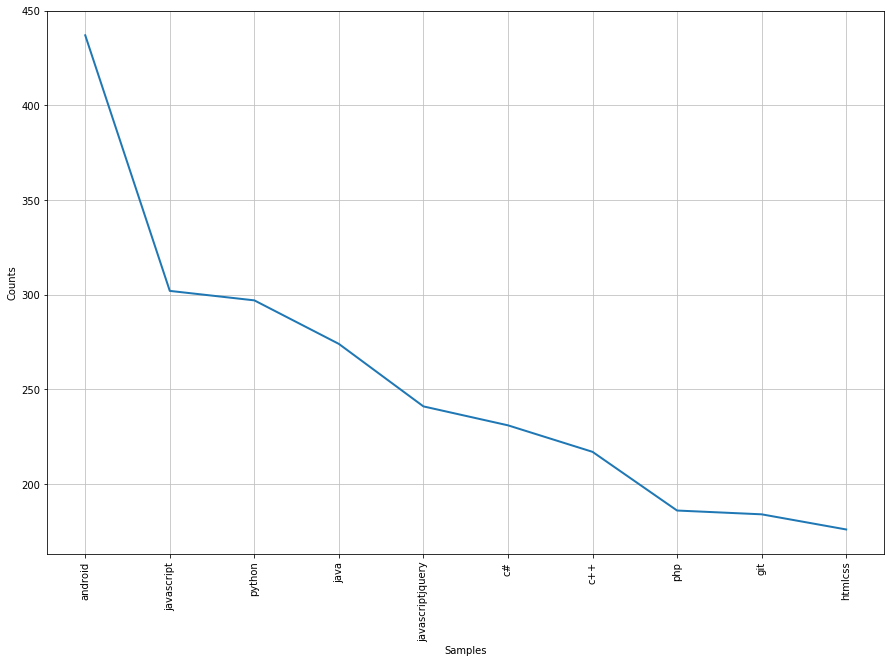

In [36]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15, 10))
keywords.plot(10, cumulative=False)

In [0]:
def most_common(tags):
    tags_filtered = []
    for i in range(0, len(tags)):
        if tags[i] in tags_features:
            tags_filtered.append(tags[i])
    return tags_filtered

In [38]:
new_ques['Tags'] = new_ques['Tags'].apply(lambda x: most_common(x))
new_ques['Tags'] = new_ques['Tags'].apply(lambda x: x if len(x)>0 else None)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [39]:
new_ques.shape

(72950, 3)

In [42]:
new_ques.head(5)

,Title,Body,Tags
205,Code to ask yes/no question in javascript,<p>I could only find the function <code>confir...,[javascript]
223,Table cells larger than they are meant to be,<p>I've created a map system for a game that r...,[htmlcss]
377,What is the best quick-read Python book out th...,<p>I am taking a class that requires Python. W...,[python]
379,duplicating jQuery datepicker,<p>The <code>datepicker</code> function only w...,[javascriptjquery]
471,Writing/Using C++ Libraries,<p>I am looking for basic examples/tutorials o...,[c++]


In [41]:
new_ques.dropna(subset=['Tags'],inplace=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [43]:
new_ques.shape

(2545, 3)

# Body


- Removing html format
- Lowering text
- Transforming abbreviations
- Removing punctuation (but keeping words like c# since it's the most popular tag)
- Lemmatizing words
- Removing stop words

In [44]:
# Converting html to text in the body
from bs4 import BeautifulSoup
new_ques['Body']=new_ques['Body'].apply(lambda x:BeautifulSoup(x).get_text())

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [0]:
import re
def clean_text(text):
    text = text.lower()
    text = re.sub(r"what's", "what is ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"can't", "can not ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r"\'scuse", " excuse ", text)
    text = re.sub(r"\'\n", " ", text)
    text = re.sub(r"\'\xa0", " ", text)
    text = re.sub('\s+', ' ', text)
    text = text.strip(' ')
    return text

In [46]:
new_ques['Body']=new_ques['Body'].apply(lambda x:clean_text(x))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [0]:
from nltk.tokenize.toktok import ToktokTokenizer
token=ToktokTokenizer()

In [0]:
import string
punct=string.punctuation

In [49]:
punct

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [0]:
def strip_list_noempty(mylist):
    newlist = (item.strip() if hasattr(item, 'strip') else item for item in mylist)
    return [item for item in newlist if item != '']

In [0]:
def clean_punct(text): 
    words=token.tokenize(text)
    punctuation_filtered = []
    regex = re.compile('[%s]' % re.escape(punct))
    remove_punctuation = str.maketrans(' ', ' ', punct)
    for w in words:
        if w in tags_features:
            punctuation_filtered.append(w)
        else:
            punctuation_filtered.append(regex.sub('', w))
  
    filtered_list = strip_list_noempty(punctuation_filtered)
        
    return ' '.join(map(str, filtered_list))

In [52]:
new_ques['Body'] = new_ques['Body'].apply(lambda x: clean_punct(x)) 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [53]:
new_ques['Body'][205]

'i could only find the function confirm that gives okcancel buttons is there any way to give yesno buttons'

In [54]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer 
from nltk.corpus import stopwords


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [0]:
lemma=WordNetLemmatizer()
stop_words = set(stopwords.words("english"))

In [0]:
def lemitizeWords(text):
    words=token.tokenize(text)
    listLemma=[]
    for w in words:
        x=lemma.lemmatize(w, pos="v")
        listLemma.append(x)
    return ' '.join(map(str, listLemma))

def stopWordsRemove(text):
    
    stop_words = set(stopwords.words("english"))
    
    words=token.tokenize(text)
    
    filtered = [w for w in words if not w in stop_words]
    
    return ' '.join(map(str, filtered))

In [57]:
new_ques['Body'] = new_ques['Body'].apply(lambda x: lemitizeWords(x)) 
new_ques['Body'] = new_ques['Body'].apply(lambda x: stopWordsRemove(x)) 


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


# Title

In [58]:
new_ques['Title'] = new_ques['Title'].apply(lambda x: str(x))
new_ques['Title'] = new_ques['Title'].apply(lambda x: clean_text(x)) 
new_ques['Title'] = new_ques['Title'].apply(lambda x: clean_punct(x)) 
new_ques['Title'] = new_ques['Title'].apply(lambda x: lemitizeWords(x)) 
new_ques['Title'] = new_ques['Title'].apply(lambda x: stopWordsRemove(x)) 


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

In [59]:
new_ques.head()

,Title,Body,Tags
205,code ask yesno question javascript,could find function confirm give okcancel butt...,[javascript]
223,table cells larger mean,create map system game run principle draw pict...,[htmlcss]
377,best quickread python book,take class require python review language clas...,[python]
379,duplicate jquery datepicker,datepicker function work first input box creat...,[javascriptjquery]
471,writingusing c++ libraries,look basic examplestutorials writecompile libr...,[c++]


# data preparation

In [78]:
new_ques.shape

(2545, 3)

In [91]:
new_ques.head()

,Title,Body,Tags
0,code ask yesno question javascript,could find function confirm give okcancel butt...,[javascript]
1,table cells larger mean,create map system game run principle draw pict...,[htmlcss]
2,best quickread python book,take class require python review language clas...,[python]
3,duplicate jquery datepicker,datepicker function work first input box creat...,[javascriptjquery]
4,writingusing c++ libraries,look basic examplestutorials writecompile libr...,[c++]


In [90]:
new_ques.drop(['index'],axis=1,inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [0]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MultiLabelBinarizer
from nltk import word_tokenize
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding, BatchNormalization, GRU ,concatenate
from tensorflow.keras.models import Model

In [95]:
multilabel_binarizer = MultiLabelBinarizer()
multilabel_binarizer.fit(new_ques.Tags)
labels = multilabel_binarizer.classes_
labels

array(['android', 'c#', 'c++', 'git', 'htmlcss', 'java', 'javascript',
       'javascriptjquery', 'php', 'python'], dtype=object)

In [0]:
train,test=train_test_split(new_ques[:550000],test_size=0.25,random_state=24)

In [97]:
train.shape,test.shape

((1908, 3), (637, 3))

In [0]:
X_train_t=train['Title']
X_train_b=train['Body']
y_train=multilabel_binarizer.transform(train['Tags'])
X_test_t=test['Title']
X_test_b=test['Body']
y_test=multilabel_binarizer.transform(test['Tags'])

In [101]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [102]:
import nltk
from nltk import word_tokenize
sent_lens_t=[]
for sent in train['Title']:
    sent_lens_t.append(len(word_tokenize(sent)))
max(sent_lens_t)

14

In [0]:
max_len_t=14

In [0]:

tok = Tokenizer(char_level=False,split=' ')
tok.fit_on_texts(X_train_t)
sequences_train_t = tok.texts_to_sequences(X_train_t)

In [104]:
vocab_len_t=len(tok.index_word.keys())
vocab_len_t

2302

In [107]:
sequences_matrix_train_t = sequence.pad_sequences(sequences_train_t,maxlen=max_len_t)
sequences_matrix_train_t

array([[   0,    0,    0, ..., 1006,  421,    4],
       [   0,    0,    0, ...,  352,   17,  688],
       [   0,   21,  171, ..., 1009, 1010, 1011],
       ...,
       [   0,    0,    0, ...,    1,  529,   73],
       [   0,    0,    0, ...,  300,  335,  996],
       [   0,    0,    0, ...,    0,  475,   19]], dtype=int32)

In [0]:
sequences_test_t = tok.texts_to_sequences(X_test_t)
sequences_matrix_test_t = sequence.pad_sequences(sequences_test_t,maxlen=max_len_t)

In [109]:
sequences_matrix_train_t.shape,sequences_matrix_test_t.shape,y_train.shape,y_test.shape

((1908, 14), (637, 14), (1908, 10), (637, 10))

In [110]:
sent_lens_b=[]
for sent in train['Body']:
    sent_lens_b.append(len(word_tokenize(sent)))
max(sent_lens_b)

1256

In [111]:
np.quantile(sent_lens_b,0.90)

118.0

In [0]:
max_len_b = 200
tok = Tokenizer(char_level=False,split=' ')
tok.fit_on_texts(X_train_b)
sequences_train_b = tok.texts_to_sequences(X_train_b)

In [113]:
vocab_len_b =len(tok.index_word.keys())
vocab_len_b

14007

In [114]:
sequences_matrix_train_b = sequence.pad_sequences(sequences_train_b,maxlen=max_len_b)
sequences_matrix_train_b

array([[    0,     0,     0, ...,  4490,    10,    17],
       [    0,     0,     0, ...,    11,    35,    35],
       [    0,     0,     0, ...,  1206,    48,    84],
       ...,
       [    0,     0,     0, ...,    47, 13999, 14000],
       [    0,     0,     0, ...,  5026,    55,  6282],
       [    0,     0,     0, ...,    99,     7,   376]], dtype=int32)

In [0]:
sequences_test_b = tok.texts_to_sequences(X_test_b)
sequences_matrix_test_b = sequence.pad_sequences(sequences_test_b,maxlen=max_len_b)

In [116]:
sequences_matrix_train_t.shape,sequences_matrix_train_b.shape,y_train.shape

((1908, 14), (1908, 200), (1908, 10))

In [117]:
sequences_matrix_test_t.shape,sequences_matrix_test_b.shape,y_test.shape

((637, 14), (637, 200), (637, 10))

In [0]:
def RNN():
    # Title Only
    title_input = Input(name='title_input',shape=[max_len_t])
    title_Embed = Embedding(vocab_len_t+1,2000,input_length=max_len_t,mask_zero=True,name='title_Embed')(title_input)
    gru_out_t = GRU(300)(title_Embed)
    # auxiliary output to tune GRU weights smoothly 
    auxiliary_output = Dense(10, activation='sigmoid', name='aux_output')(gru_out_t)   
    
    # Body Only
    body_input = Input(name='body_input',shape=[max_len_b]) 
    body_Embed = Embedding(vocab_len_b+1,170,input_length=max_len_b,mask_zero=True,name='body_Embed')(body_input)
    gru_out_b = GRU(200)(body_Embed)
    
    # combined with GRU output
    com = concatenate([gru_out_t, gru_out_b])
    
    # now the combined data is being fed to dense layers
    dense1 = Dense(400,activation='relu')(com)
    dp1 = Dropout(0.5)(dense1)
    bn = BatchNormalization()(dp1) 
    dense2 = Dense(150,activation='relu')(bn)
    
    main_output = Dense(10, activation='sigmoid', name='main_output')(dense2)
    
    model = Model(inputs=[title_input, body_input],outputs=[main_output, auxiliary_output])
    return model

In [119]:
model = RNN()
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
title_input (InputLayer)        [(None, 14)]         0                                            
__________________________________________________________________________________________________
body_input (InputLayer)         [(None, 200)]        0                                            
__________________________________________________________________________________________________
title_Embed (Embedding)         (None, 14, 2000)     4606000     title_input[0][0]                
__________________________________________________________________________________________________
body_Embed (Embedding)          (None, 200, 170)     2381360     body_input[0][0]                 
______________________________________________________________________________________________

In [0]:
model.compile(optimizer='adam',loss={'main_output': 'categorical_crossentropy', 'aux_output': 'categorical_crossentropy'},
              metrics=['accuracy'])

In [121]:
results=model.fit({'title_input': sequences_matrix_train_t, 'body_input': sequences_matrix_train_b},
          {'main_output': y_train, 'aux_output': y_train},
          validation_data=[{'title_input': sequences_matrix_test_t, 'body_input': sequences_matrix_test_b},
          {'main_output': y_test, 'aux_output': y_test}],
          epochs=5, batch_size=800)

Train on 1908 samples, validate on 637 samples
Epoch 1/5
1908/1908 [==============================] - 10s 5ms/sample - loss: 4.5408 - main_output_loss: 2.2136 - aux_output_loss: 2.2988 - main_output_accuracy: 0.2117 - aux_output_accuracy: 0.1378 - val_loss: 4.5666 - val_main_output_loss: 2.2768 - val_aux_output_loss: 2.2898 - val_main_output_accuracy: 0.4804 - val_aux_output_accuracy: 0.2590
Epoch 2/5
1908/1908 [==============================] - 1s 627us/sample - loss: 4.1694 - main_output_loss: 1.8662 - aux_output_loss: 2.2831 - main_output_accuracy: 0.6274 - aux_output_accuracy: 0.3187 - val_loss: 4.5160 - val_main_output_loss: 2.2454 - val_aux_output_loss: 2.2705 - val_main_output_accuracy: 0.5102 - val_aux_output_accuracy: 0.4317
Epoch 3/5
1908/1908 [==============================] - 1s 636us/sample - loss: 3.9085 - main_output_loss: 1.6342 - aux_output_loss: 2.2607 - main_output_accuracy: 0.7951 - aux_output_accuracy: 0.5147 - val_loss: 4.4461 - val_main_output_loss: 2.2020 - val_

In [122]:
(predicted_main, predicted_aux)=model.predict({'title_input': sequences_matrix_test_t, 'body_input': sequences_matrix_test_b},verbose=1)

637/637 [==============================] - 2s 4ms/sample


In [0]:
from sklearn.metrics import classification_report,f1_score

In [124]:
print(f1_score(y_test,predicted_main>.55,average='samples'))

0.4913657770800628


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in samples with no predicted labels.
  'precision', 'predicted', average, warn_for)


In [125]:
print(classification_report(y_test,predicted_main>.55))

              precision    recall  f1-score   support

           0       0.83      0.77      0.80       130
           1       0.62      0.23      0.34        56
           2       0.35      0.18      0.24        50
           3       1.00      0.73      0.84        48
           4       0.48      0.35      0.41        34
           5       1.00      0.35      0.52        63
           6       0.71      0.67      0.69        75
           7       0.57      0.34      0.43        58
           8       1.00      0.38      0.55        45
           9       0.89      0.64      0.75        78

   micro avg       0.77      0.51      0.62       637
   macro avg       0.75      0.46      0.56       637
weighted avg       0.77      0.51      0.60       637
 samples avg       0.48      0.51      0.49       637



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels.
  'precision', 'predicted', average, warn_for)


In [126]:
test.iloc[24]

Title                   fastest way format phone number c#
Body     fastest way format string use us phone format ...
Tags                                                  [c#]
Name: 92, dtype: object

In [127]:
predicted_main[24].round(decimals = 2)

array([0.42, 0.57, 0.59, 0.42, 0.46, 0.39, 0.42, 0.4 , 0.43, 0.41],
      dtype=float32)

In [128]:
labels

array(['android', 'c#', 'c++', 'git', 'htmlcss', 'java', 'javascript',
       'javascriptjquery', 'php', 'python'], dtype=object)

In [0]:
model.save('./stackoverflow_tags.h5')